In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid",context="notebook")
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# Check percentage of missing data

missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['column', 'Missing_Values']
missing_df['Missing_Percent'] = (missing_df['Missing_Values'] / len(df)) * 100
missing_df.sort_values('Missing_Percent', ascending=False)


,column,Missing_Values,Missing_Percent
10,Cabin,687,77.104377
5,Age,177,19.865320
11,Embarked,2,0.224467
0,PassengerId,0,0.000000
3,Name,0,0.000000
2,Pclass,0,0.000000
1,Survived,0,0.000000
4,Sex,0,0.000000
7,Parch,0,0.000000
6,SibSp,0,0.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe(include ='object').T

,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


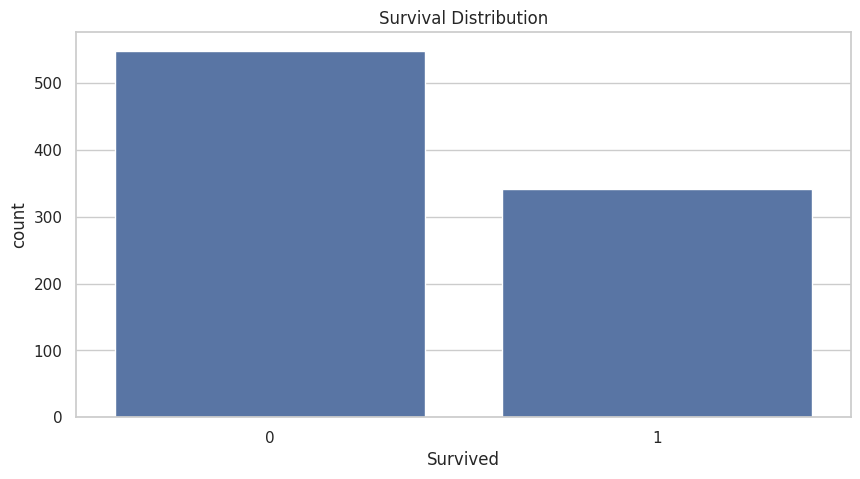

In [ ]:
# Target variable analysis

df['Survived'].value_counts(normalize=True) * 100
sns.countplot(x='Survived',data=df)
plt.title("Survival Distribution")
plt.show()

In [ ]:
# Univariate Analysis


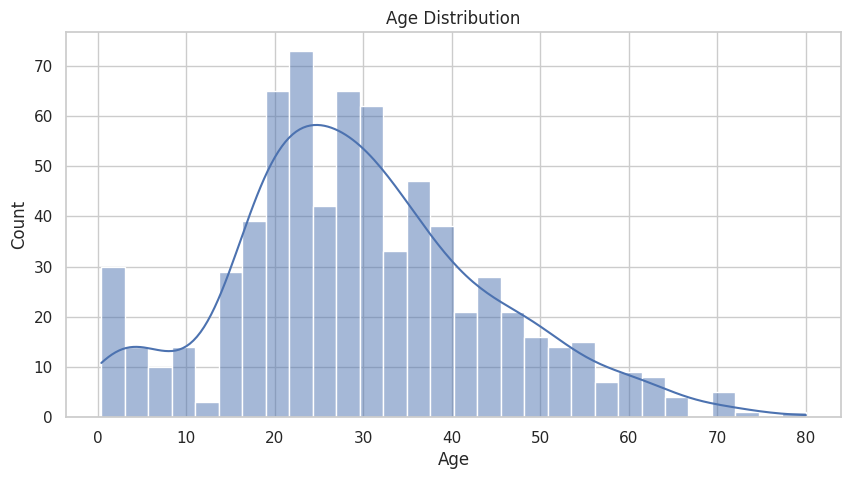

In [ ]:
sns.histplot(df['Age'], bins = 30, kde = True)
plt.title("Age Distribution")
plt.show()

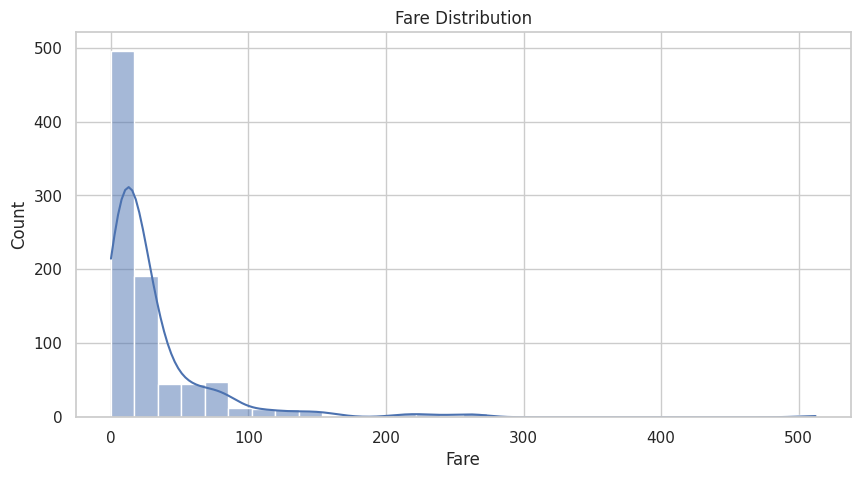

In [ ]:
sns.histplot(df['Fare'], bins = 30, kde = True)
plt.title("Fare Distribution")
plt.show()

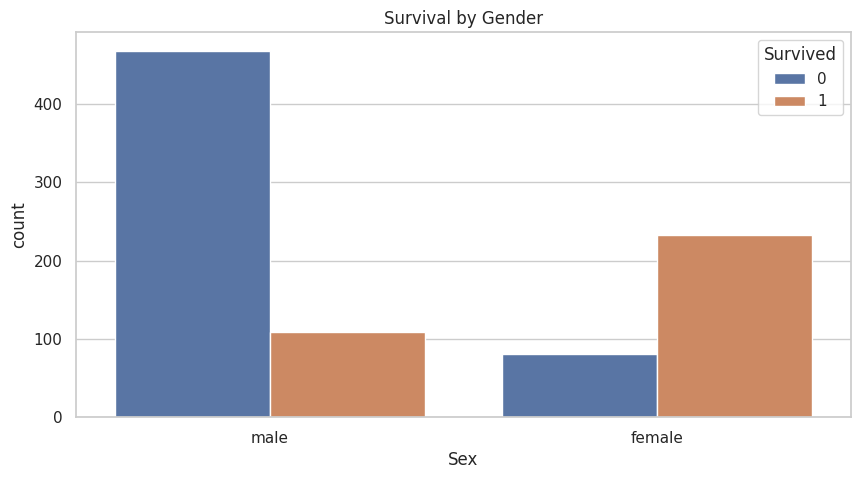

In [ ]:
# Categorical Variable Analysis
# Gender vs Survival

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

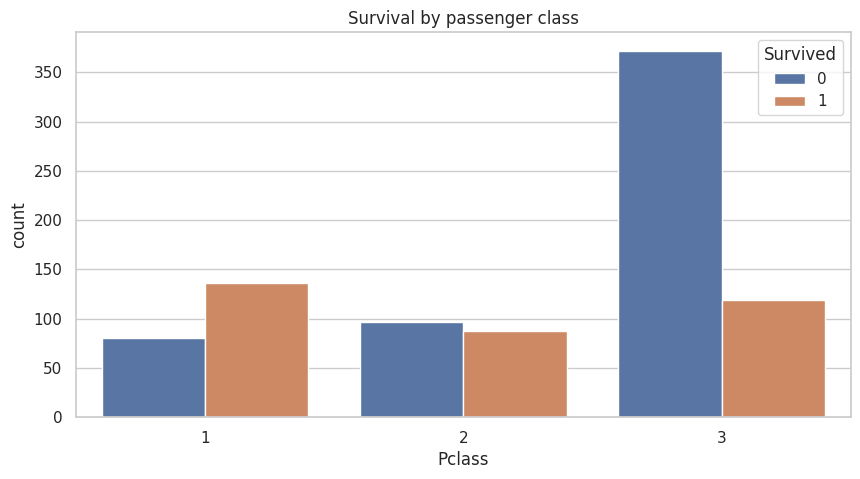

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by passenger class")
plt

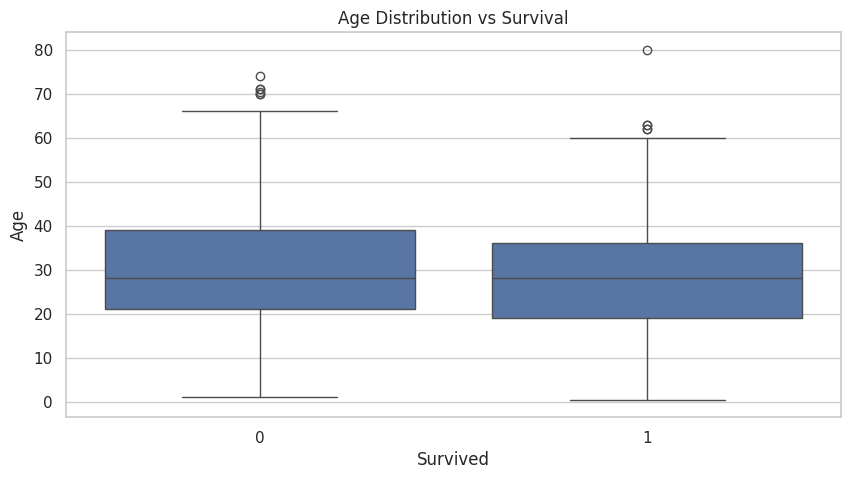

In [ ]:
#By variate Analysis
sns.boxplot(x='Survived', y='Age' ,data=df)
plt.title("Age Distribution vs Survival")
plt.show()

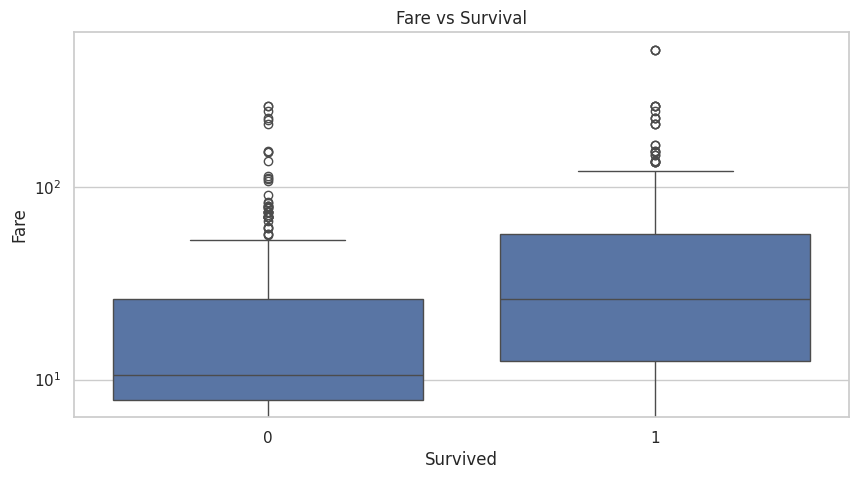

In [ ]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.yscale('log')
plt.title("Fare vs Survival")
plt.show()

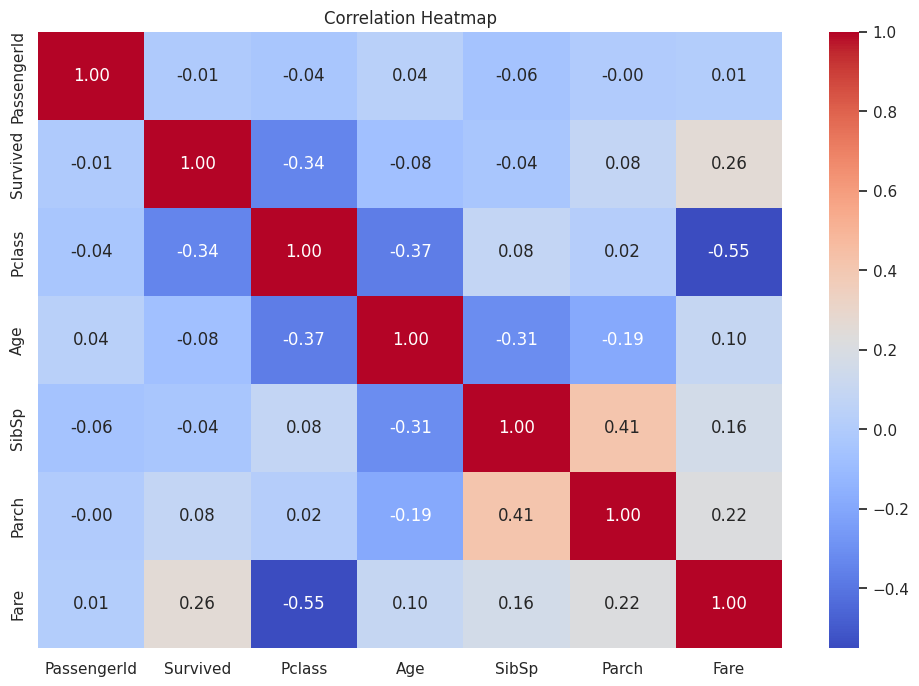

In [ ]:
# Co-relation Analysis

numeric_df = df.select_dtypes(include=['int64','float64'])

corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


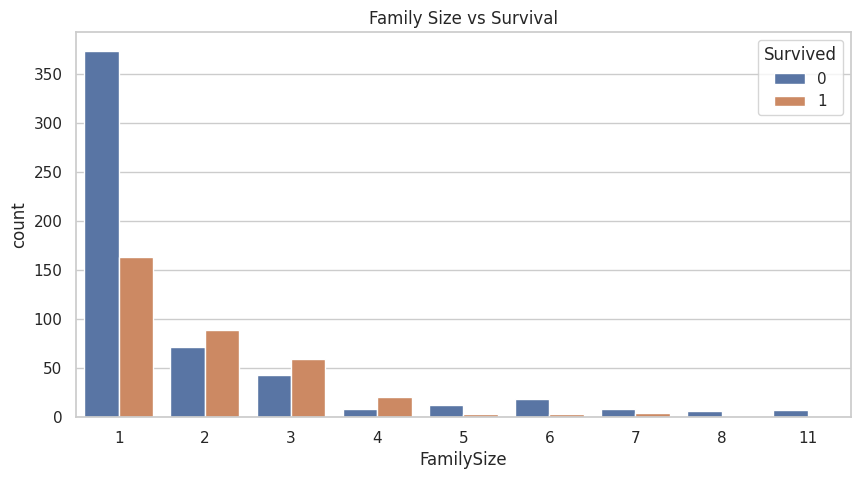

In [ ]:
# Feature Engineering

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Family Size vs Survival")
plt.show()

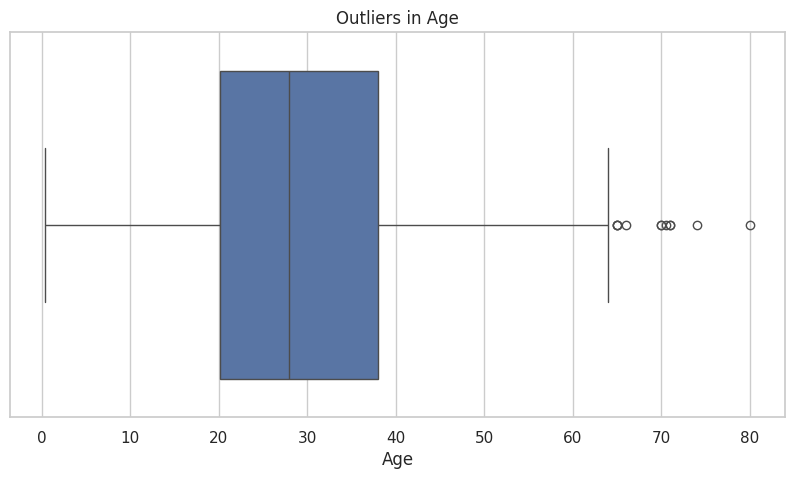

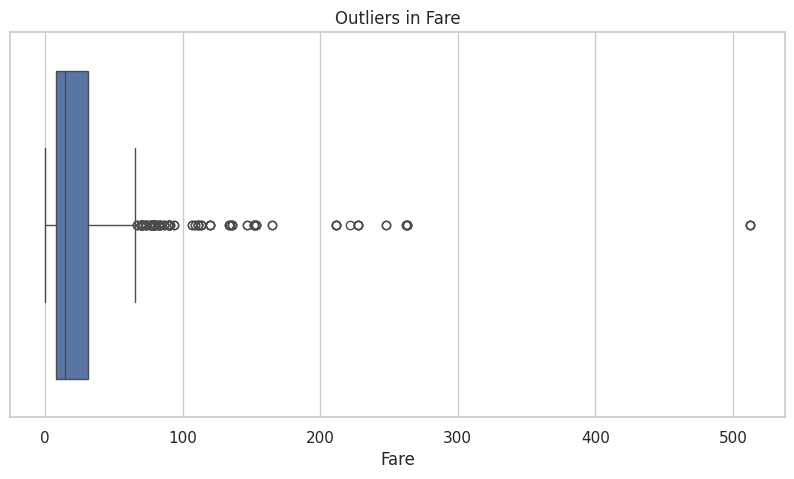

In [ ]:
# Outlier detection

for col in ['Age', 'Fare']:
  sns.boxplot(x=df[col])
  plt.title(f"Outliers in {col}")
  plt.show()


In [ ]:
# Z- Score calculation

z_scores = np.abs(stats.zscore(df[['Age', 'Fare']].dropna()))
outliers =(z_scores > 3).sum(axis=0)
outliers

array([ 2, 18])

In [ ]:
eda_summary = {
    "Total Rows":df.shape[0],
    "Total Columns":df.shape[1],
    "Missing Columns":missing_df[missing_df['Missing_Values'] > 0]['column'].tolist(),
    "Target Balance(%)":df['Survived'].value_counts(normalize=True).to_dict(),
    "Highly correlated Feature": corr[corr> 0.7].stack().index.tolist()
}
eda_summary

{'Total Rows': 891,
 'Total Columns': 13,
 'Missing Columns': ['Age', 'Cabin', 'Embarked'],
 'Target Balance(%)': {0: 0.6161616161616161, 1: 0.3838383838383838},
 'Highly correlated Feature': [('PassengerId', 'PassengerId'),
  ('Survived', 'Survived'),
  ('Pclass', 'Pclass'),
  ('Age', 'Age'),
  ('SibSp', 'SibSp'),
  ('Parch', 'Parch'),
  ('Fare', 'Fare')]}